# **Project Name**    - 

# **Air bnb Booking Analysis**

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


what are different property listed in each neighbourhood group?

what are different  room types available  by most of  host with respective neighbourhood?

what are the most expensive properties at neighbourhood group?


what is mostly available property in each neighbourhood?

#### **Define Your Business Objective?**

Data Forecast showing  future demand for various roomtypes and preferred locations for business expansion based on various parameters



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
#url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=share_link'
file_path='/content/drive/MyDrive/csvfiles/Copy of Airbnb NYC 2019.csv'
df=pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape[0]

48895

In [ ]:
df.shape[1]

16

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

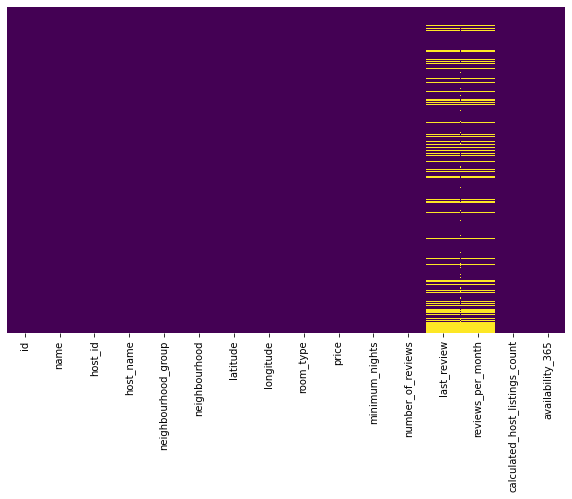

In [ ]:
import matplotlib
# Visualizing the missing values
matplotlib.rcParams['figure.figsize']=(10,6)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Figure size 720x432 with 0 Axes>

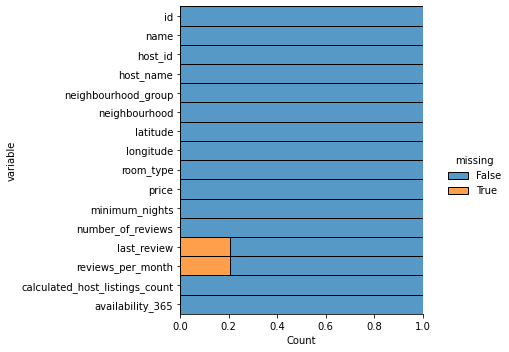

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


percentage of null values

In [ ]:
(df.isnull().sum()/len(df))*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### What did you know about your dataset?

the data provided has 48895 rows and 16 unique columns ,from basic analysis we can see there are 20% of null values in both columns reviews_per_month  and last_review

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.unique()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Variables Description 

•	NAME

•	HOST_ID

•	HOST_NAME

•	NEIGHBOURHOOD_GROUP

•	NEIGHBOURHOOD

•	LATITUDE

•	LONGITUDE

•	ROOM_TYPE

•	PRICE

•	MINIMUM_NIGHTS

•	NUMBER_OF_REVIEWS

•	LAST_REVIEW

•	REVIEWS_PER_MONTH

•	CALCULATED_HOST_LISTINGS_COUNT

•	AVAILABILITY_365



### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64


unique host_id-From Unique Counts above we can see that in this dataset there are 37457 unique hosts renting out a total number of 48895 properties
---



top 10 hosts with most of properties

In [12]:
top_10_hosts_with_most_properties = df.host_id.value_counts().head(10)
top_10_hosts_with_most_properties

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

Text(0.5, 1.0, 'No of choices per Room Type')

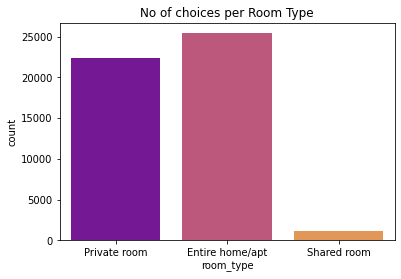

In [6]:
#most preferred choice by room type
df['room_type'].value_counts()
sns.countplot(x='room_type',data=df, palette="plasma")
plt.title('No of choices per Room Type')


from above bar graph we can see most preferred type is entire home/apt

In [18]:
neighbourhoods_group_with_most_properties = df.neighbourhood_group.value_counts()
neighbourhoods_group_with_most_properties

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

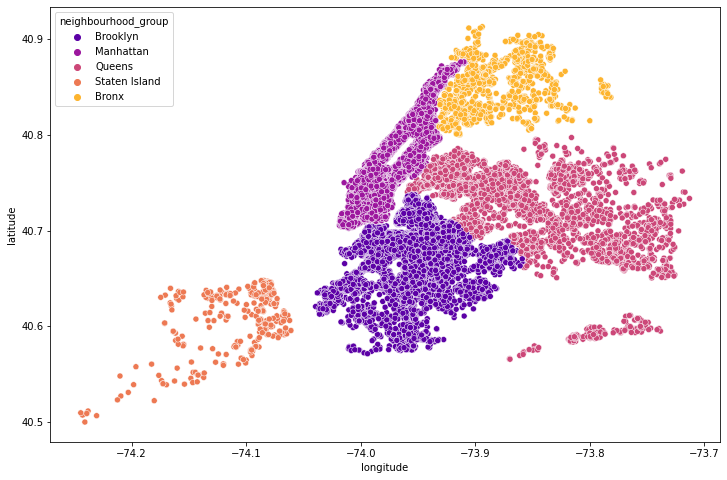

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,palette="plasma")
plt.show()

price distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

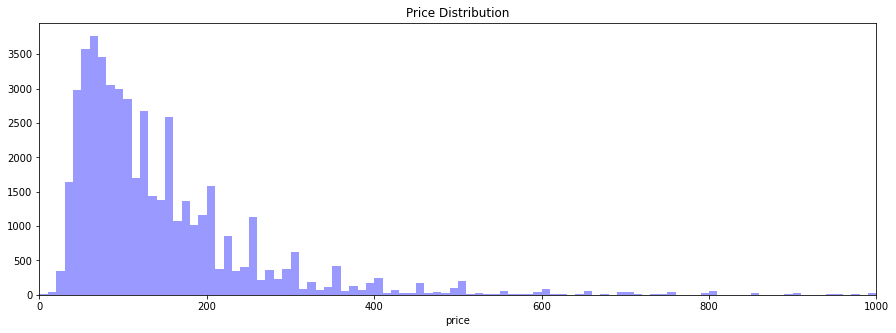

In [27]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'],hist=True, kde=False, bins=1000, color='blue')
plt.xlim(0, 1000)
plt.title('Price Distribution')

In [28]:
price_df = df[['neighbourhood_group', 'price']]
price_df.head(5)


,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80


In [29]:
price_df.groupby('neighbourhood_group')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Average price of properties in Manhattan is highest and Average price of properties in Bronx is lowest

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

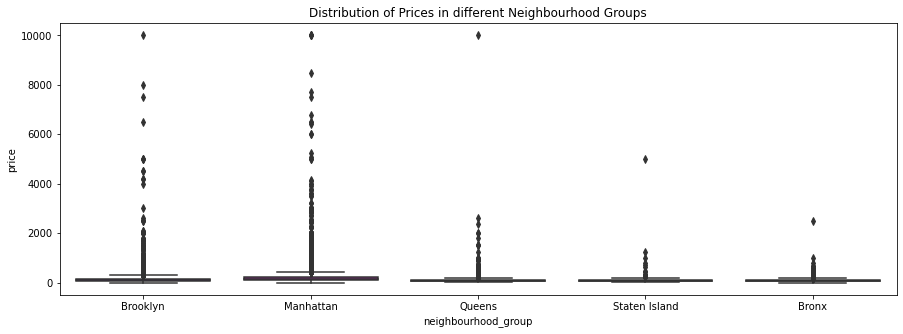

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(data=price_df, x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

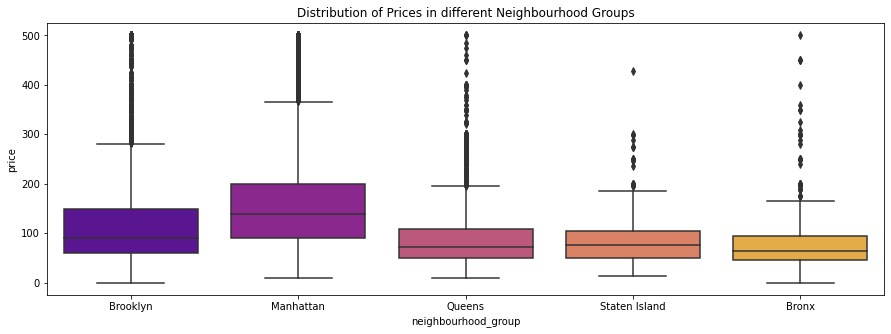

In [ ]:
#Removing skewed prices
plt.figure(figsize=(15,5))
sns.boxplot(data=price_df[price_df['price'] <= 500], x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

Text(0.5, 1.0, 'Distribution of Prices in different Neighbourhood Groups')

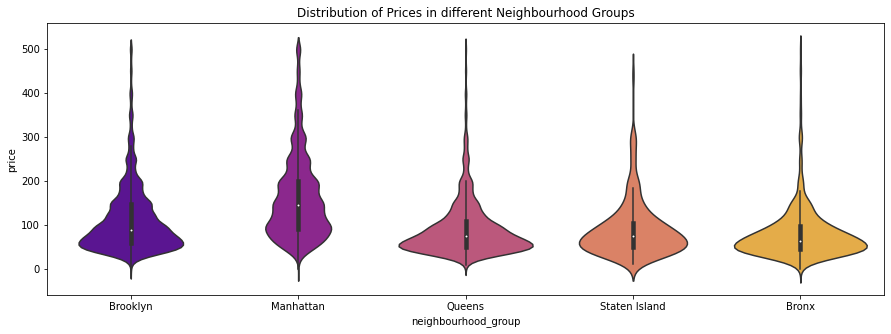

In [35]:
#Removing skewed prices
plt.figure(figsize=(15,5))
sns.violinplot(data=price_df[price_df['price'] <= 500], x='neighbourhood_group', y='price', palette="plasma")
plt.title('Distribution of Prices in different Neighbourhood Groups')

price and room type

Text(0.5, 1.0, 'Distribution of Prices for different Room Types')

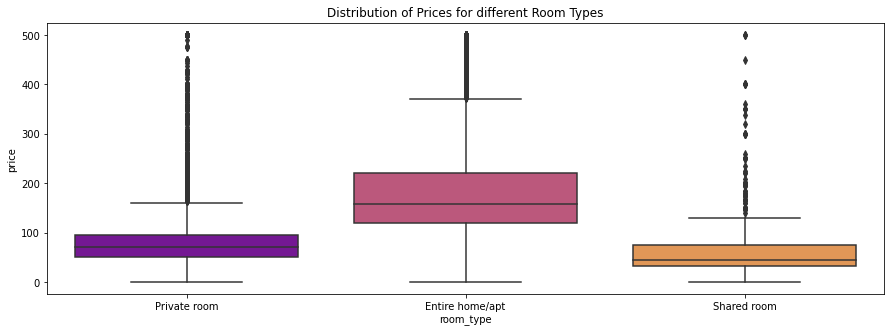

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df[df['price'] <= 500], x='room_type', y='price', palette="plasma")
plt.title('Distribution of Prices for different Room Types')

In [ ]:
#property listed in each neighbourhood
property_df=df.groupby('neighbourhood_group')['room_type'].value_counts()
property_df

neighbourhood_group  room_type      
Bronx                Private room        524
                     Entire home/apt     308
                     Shared room          43
Brooklyn             Entire home/apt    8159
                     Private room       7990
                     Shared room         290
Manhattan            Entire home/apt    9962
                     Private room       6303
                     Shared room         356
Queens               Private room       2678
                     Entire home/apt    1742
                     Shared room         152
Staten Island        Private room        159
                     Entire home/apt     150
                     Shared room           5
Name: room_type, dtype: int64

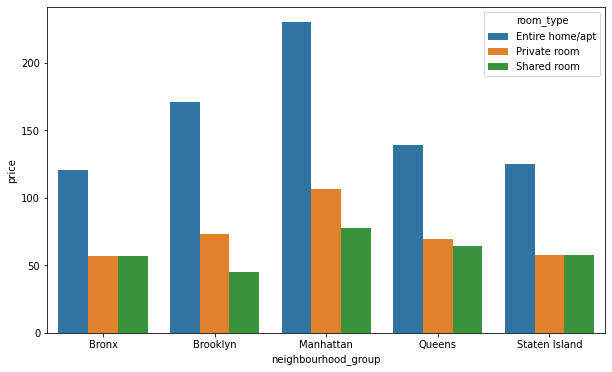

In [ ]:
plt.figure(figsize=(10,6))
mean_price_df = df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
sns.barplot(data=mean_price_df, x='neighbourhood_group', y ='price', hue='room_type')

In [38]:
#most expensive properties at neighbourhood for top10
df1 = df.groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Average price per night"}).head(15)

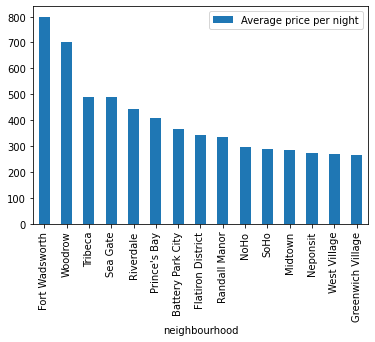

,Average price per night
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [39]:
df1.plot(kind='bar')
plt.show()
pd.DataFrame(df1)

different  room types available  by most of  host with respective neighbourhood

In [ ]:
df2=df.groupby(['room_type','neighbourhood_group'])['host_id'].value_counts()
type(df2)

pandas.core.series.Series

<Figure size 1440x432 with 0 Axes>

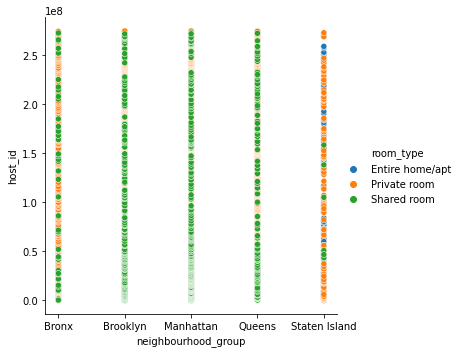

In [ ]:
plt.figure(figsize=(20,6))
sns.relplot(x ='neighbourhood_group',y='host_id',hue='room_type' ,data = df2);

In [ ]:
corr1 = df.corr()

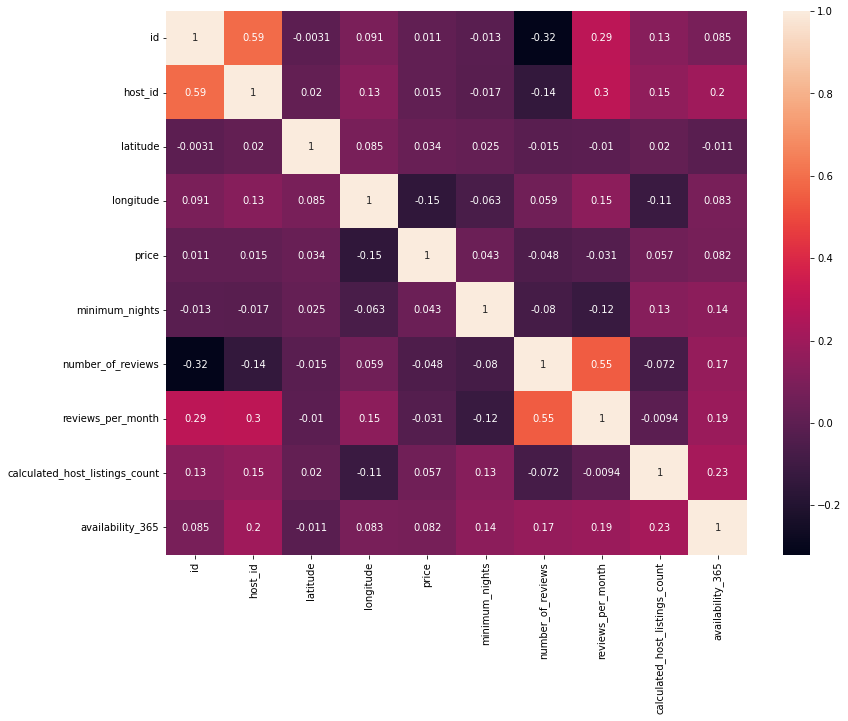

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(corr1, annot=True)


** top 5 most reviewed for different hosts in neighbourhoods**

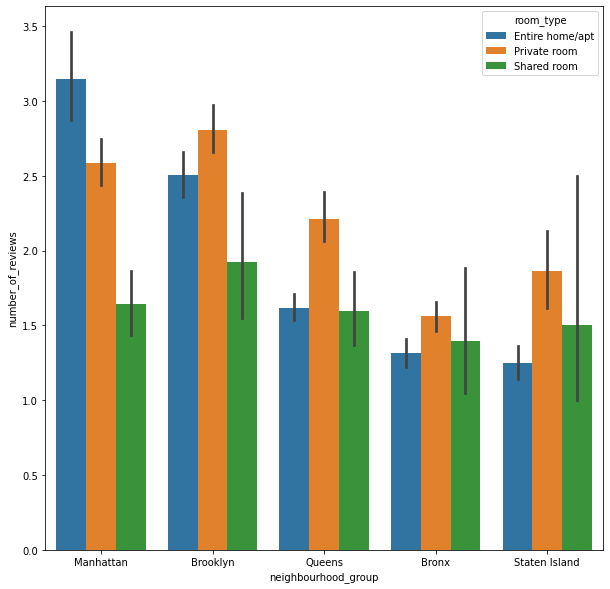

In [ ]:
plt.figure(figsize=(10,10))
df5 = df.groupby(['neighbourhood_group', 'room_type','host_name'], as_index=False)['number_of_reviews'].agg('count').sort_values(by="number_of_reviews",ascending=False)
sns.barplot(data=df5, x='neighbourhood_group', y ='number_of_reviews', hue='room_type')

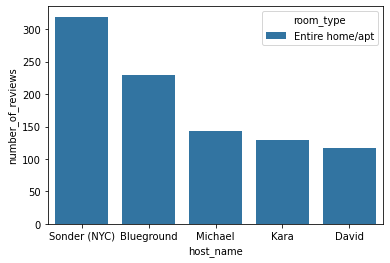

In [ ]:
df6=pd.DataFrame(df5).head(5)
sns.barplot(data=df6,x='host_name',y='number_of_reviews',hue='room_type')

as per above we can see manhanttan is most reviewed neighbouhood and visited place and host Sonder (NYC) has maximum reviews for categeory of entire home/Apt

which room type is mostly available in each neighbourhood ?

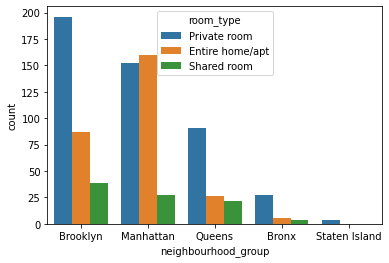

In [ ]:
sns.countplot(data=df[df['availability_365']  == 365], x='neighbourhood_group', hue='room_type')